### Problem statement: Patients with liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. In an effort to reduce the burden on doctors, the government has hired you as a data scientist to build a predictive machine learning that would give an indication of whether a person would have a liver problem or not. Now, as a data scientist, your goal is to build a logistic machine learning model that predicts whether a patient is healthy (non-liver patient) or ill (liver patient) based on some clinical and demographic features (or input variables)

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_dataset.csv')
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Liver_Problem  
0      3.3                        0.90              1  
1      3.2                        0.74              1  
2      3.3                        0.89              1  
3      3.4                        1.00              1  
4      2.4                        0.40              1

#### We have 10 features and one label column, we will check data description and info

In [3]:
#Data description
data.describe()

Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
count  500.0000       500.000000        500.000000            500.000000   
mean    44.5860         2.603800          1.117200            296.372000   
std     16.5334         5.120238          2.066709            257.461676   
min      4.0000         0.400000          0.100000             63.000000   
25%     32.7500         0.800000          0.200000            175.000000   
50%     45.0000         0.900000          0.300000            205.500000   
75%     58.0000         2.200000          1.000000            298.000000   
max     85.0000        75.000000         14.200000           2110.000000   

       Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
count                500.000000                  500.000000       500.00000   
mean                  82.736000                  108.820000         6.44480   
std                  194.366775                  307.093557         1.08902   
min                   10.000000                   10.000000         2.70000   
25%                   23.000000                   24.750000         5.70000   
50%                   33.500000                   40.000000         6.50000   
75%                   59.250000                   79.250000         7.20000   
max                 2000.000000                 4929.000000         9.60000   

          Albumin  Albumin_and_Globulin_Ratio  Liver_Problem  
count  500.000000                  496.000000     500.000000  
mean     3.168800                    0.960907       1.300000  
std      0.799741                    0.294289       0.458717  
min      0.900000                    0.300000       1.000000  
25%      2.600000                    0.795000       1.000000  
50%      3.100000                    1.000000       1.000000  
75%      3.800000                    1.100000       2.000000  
max      5.500000                    1.900000       2.000000

In [4]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int64  
 1   Gender                      500 non-null    object 
 2   Total_Bilirubin             500 non-null    float64
 3   Direct_Bilirubin            500 non-null    float64
 4   Alkaline_Phosphotase        500 non-null    int64  
 5   Alamine_Aminotransferase    500 non-null    int64  
 6   Aspartate_Aminotransferase  500 non-null    int64  
 7   Total_Protiens              500 non-null    float64
 8   Albumin                     500 non-null    float64
 9   Albumin_and_Globulin_Ratio  496 non-null    float64
 10  Liver_Problem               500 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 43.1+ KB


count    496.000000
mean       0.960907
std        0.294289
min        0.300000
25%        0.795000
50%        1.000000
75%        1.100000
max        1.900000
Name: Albumin_and_Globulin_Ratio, dtype: float64

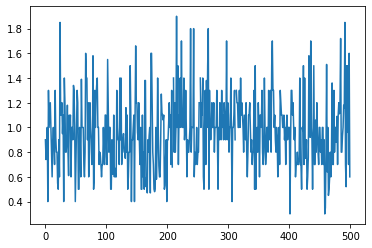

In [5]:
#We have four null values for Albumin_and_Globulin_Ratio, we will see the distribution of the column
data['Albumin_and_Globulin_Ratio'].plot()
data['Albumin_and_Globulin_Ratio'].describe()

In [6]:
#As the std is less, we can replace the null values (<1%) with the mean
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean(), inplace = True)
data['Albumin_and_Globulin_Ratio'].describe()

count    500.000000
mean       0.960907
std        0.293107
min        0.300000
25%        0.800000
50%        1.000000
75%        1.100000
max        1.900000
Name: Albumin_and_Globulin_Ratio, dtype: float64

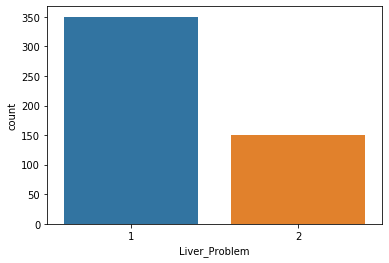

In [7]:
#Check the label coumn
sns.countplot(data['Liver_Problem'])

In [8]:
#Here Liver_Patient = 2 implies patient is not liver patient, we will replace 2 with 0 for simplicity and readability
data['Gender'] = data['Gender'].replace(2, 0)
data['Gender'].value_counts()

Male      372
Female    128
Name: Gender, dtype: int64

In [9]:
#We will perform LabelEncoding on Gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65       0              0.7               0.1                   187   
1   62       1             10.9               5.5                   699   
2   62       1              7.3               4.1                   490   
3   58       1              1.0               0.4                   182   
4   72       1              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Liver_Problem  
0      3.3                        0.90              1  
1      3.2                        0.74              1  
2      3.3                        0.89              1  
3      3.4                        1.00              1  
4      2.4                        0.40              1

### Split features and label and then to train and test data

In [10]:
#Split into features and label
features = data.iloc[:, :-1]
label = data['Liver_Problem']
print("Features shape: ", features.shape)
print("Label shape: ", label.shape)

Features shape:  (500, 10)
Label shape:  (500,)


In [11]:
#Divide the data into train test split
from sklearn.model_selection import train_test_split
def train_test(features, label):
    X_train, X_test, y_train, y_test = train_test_split(features, label, train_size = 0.8, random_state = 42)
    return X_train, X_test, y_train, y_test

### Build a logistic Regression with all the features

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test(features, label)
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Check accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy of Logistic Regression: ", accuracy)

Accuracy of Logistic Regression:  0.66


C:\Users\thakk\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Build a Random Forest with all features

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test(features, label)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#Check accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy of Logistic Regression: ", accuracy)

Accuracy of Logistic Regression:  0.66


## Feature Selection

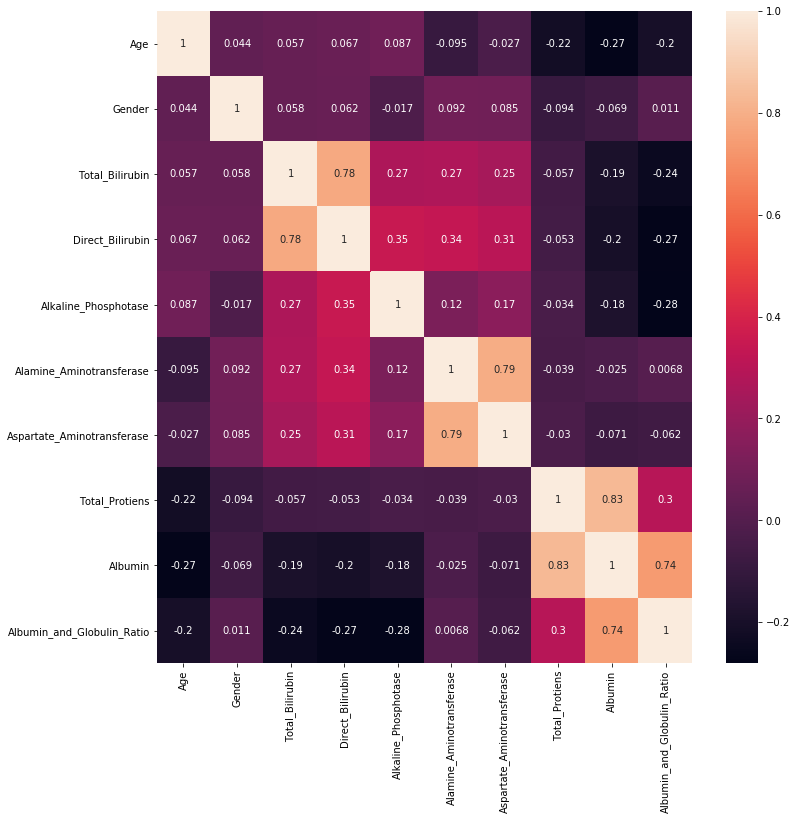

In [14]:
#View the correlation among features
plt.rcParams['figure.figsize'] = 12, 12
sns.heatmap(features.corr(), annot = True)

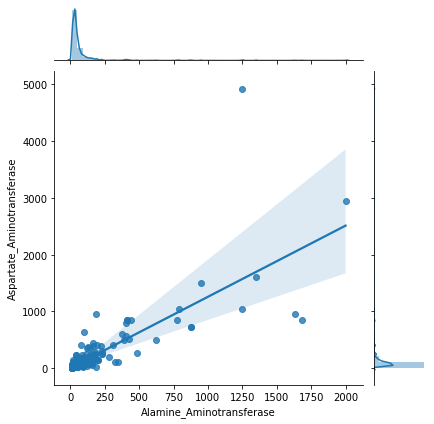

In [15]:
#Correlation between Alamine_Aminotransferase and Aspartate_Aminotransferase is high
sns.jointplot(data['Alamine_Aminotransferase'], data['Aspartate_Aminotransferase'], kind = 'reg')

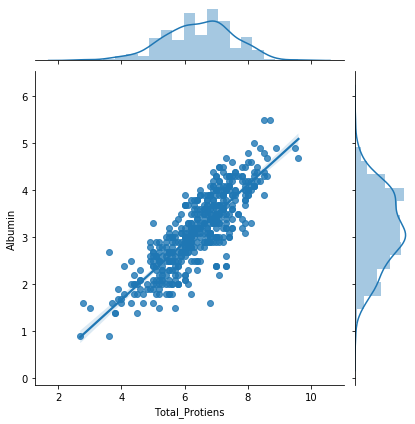

In [16]:
#Correlation between Total Protiens and Albumin
sns.jointplot(data['Total_Protiens'], data['Albumin'], kind = 'reg')

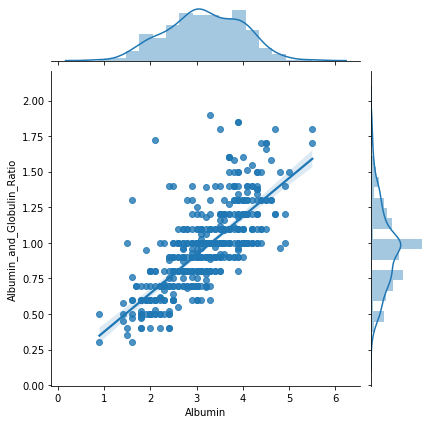

In [17]:
#Correlation between Albumin and Albumin and Globulin Ratio
sns.jointplot(data['Albumin'], data['Albumin_and_Globulin_Ratio'], kind = 'reg')

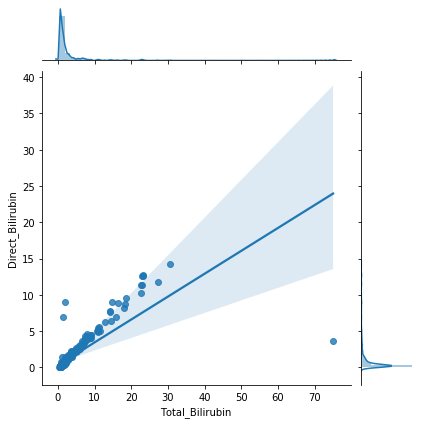

In [18]:
#Correlation between Total Bilirubin and Direct Bilirubin
sns.jointplot(data['Total_Bilirubin'], data['Direct_Bilirubin'], kind = 'reg')

#### We see almost linear relationship between Direct_Bilirubin & Total_Bilirubin, Aspartate_Aminotransferase & Alamine_Aminotransferase, Total_Protiens & Albumin, Albumin_and_Globulin_Ratio & Albumin, so we can omit one of each

In [19]:
#Select uncorrelated features
data_final = data[['Age', 'Gender', 'Direct_Bilirubin', 'Total_Protiens', 'Albumin', 'Aspartate_Aminotransferase']]
cols = data_final.columns
data_final.head()

Age  Gender  Direct_Bilirubin  Total_Protiens  Albumin  \
0   65       0               0.1             6.8      3.3   
1   62       1               5.5             7.5      3.2   
2   62       1               4.1             7.0      3.3   
3   58       1               0.4             6.8      3.4   
4   72       1               2.0             7.3      2.4   

   Aspartate_Aminotransferase  
0                          18  
1                         100  
2                          68  
3                          20  
4                          59

In [20]:
#Perform logistic regression on selected features
X_train, X_test, y_train, y_test = train_test(data_final, label)
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

#Check accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy of Logistic Regression: ", accuracy)

Accuracy of Logistic Regression:  0.62


In [21]:
#Random Forest on selected features
X_train, X_test, y_train, y_test = train_test(data_final, label)
rf = RandomForestClassifier()
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#Check accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy of Random Forest: ", accuracy)

Accuracy of Random Forest:  0.67


### Hyperparameter Tuning

In [22]:
#Random Forest

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [23]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [24]:
#Get the best score
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [25]:
#Prepare the model on whole data with best parameters
rf = RandomForestClassifier(n_estimators = 1000, min_samples_split = 5, min_samples_leaf = 2, max_features = 'sqrt', max_depth = 20, bootstrap = True)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

#Check accuracy
accuracy = accuracy_score(y_pred, y_test)
print("Accuracy of Random Forest: ", accuracy)

Accuracy of Random Forest:  0.63


In [26]:
#Get the predictions for test_data
eval_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/liver_patient_data/indian_liver_patient_new_testdataset.csv')
eval_data.head()

Age Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   36   Male              2.8               1.5                   305   
1   42   Male              0.8               0.2                   127   
2   53   Male             19.8              10.4                   238   
3   32   Male             30.5              17.1                   218   
4   32   Male             32.6              14.1                   219   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        28                          76             5.9   
1                        29                          30             4.9   
2                        39                         221             8.1   
3                        39                          79             5.5   
4                        95                         235             5.8   

   Albumin  Albumin_and_Globulin_Ratio  
0      2.5                         0.7  
1      2.7                         1.2  
2      2.5                         0.4  
3      2.7                         0.9  
4      3.1                         1.1

In [27]:
#Covert Gender to numneric
eval_data['Gender'] = le.fit_transform(eval_data['Gender'])
eval_data.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   36       1              2.8               1.5                   305   
1   42       1              0.8               0.2                   127   
2   53       1             19.8              10.4                   238   
3   32       1             30.5              17.1                   218   
4   32       1             32.6              14.1                   219   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        28                          76             5.9   
1                        29                          30             4.9   
2                        39                         221             8.1   
3                        39                          79             5.5   
4                        95                         235             5.8   

   Albumin  Albumin_and_Globulin_Ratio  
0      2.5                         0.7  
1      2.7                         1.2  
2      2.5                         0.4  
3      2.7                         0.9  
4      3.1                         1.1

In [28]:
#Select only limited features
eval_data_final = eval_data[cols]
eval_data_final

Age  Gender  Direct_Bilirubin  Total_Protiens  Albumin  \
0    36       1               1.5             5.9      2.5   
1    42       1               0.2             4.9      2.7   
2    53       1              10.4             8.1      2.5   
3    32       1              17.1             5.5      2.7   
4    32       1              14.1             5.8      3.1   
..  ...     ...               ...             ...      ...   
77   60       1               0.1             5.9      1.6   
78   40       1               0.1             6.0      3.2   
79   52       1               0.2             6.4      3.2   
80   31       1               0.5             6.8      3.4   
81   38       1               0.3             7.3      4.4   

    Aspartate_Aminotransferase  
0                           76  
1                           30  
2                          221  
3                           79  
4                          235  
..                         ...  
77                          34  
78                          31  
79                          49  
80                          32  
81                          24  

[82 rows x 6 columns]

In [29]:
#Get the predictions
y_pred_final = rf.predict(eval_data_final)

#Convert to dataFrame
prediction = pd.DataFrame(y_pred_final, columns = ['prediction']).to_csv('results.csv', index = False)

#### The model was 84.5% accurate on final test data set